In [22]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('laptop_price.csv',encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [29]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [30]:
df = df[['Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros']]
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [31]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [32]:
df.duplicated().sum()

28

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [34]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32','int64','float32','float64']).columns
catvars,numvars

(Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price_euros'], dtype='object'))

In [35]:
def valuecounts(col):
    print(f'value counts of the particular col {col} is {df[col].value_counts}')

def uniquevals(col):
    print(f'Details of the particular col {col} is {df[col].unique()}')


for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col Product is ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBo

In [36]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


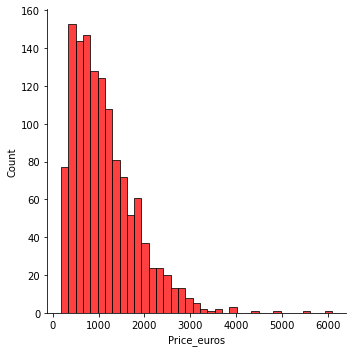

In [39]:
# viewing the distribution of the price

sn.displot(df['Price_euros'], color='red')

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

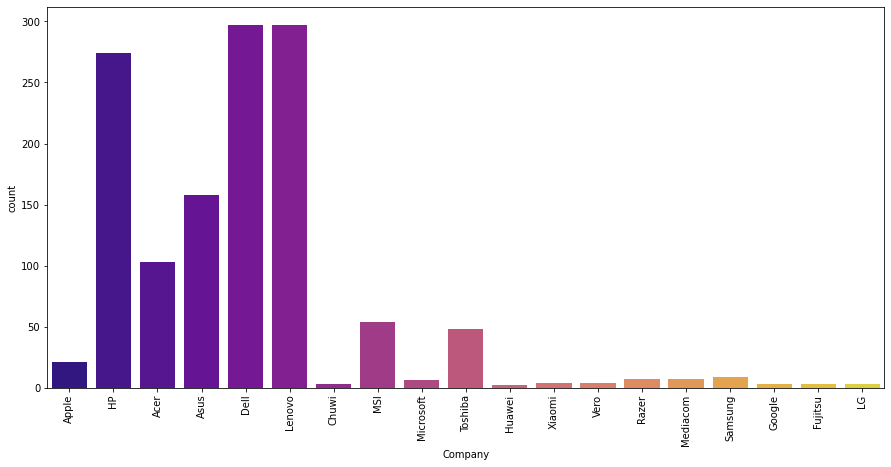

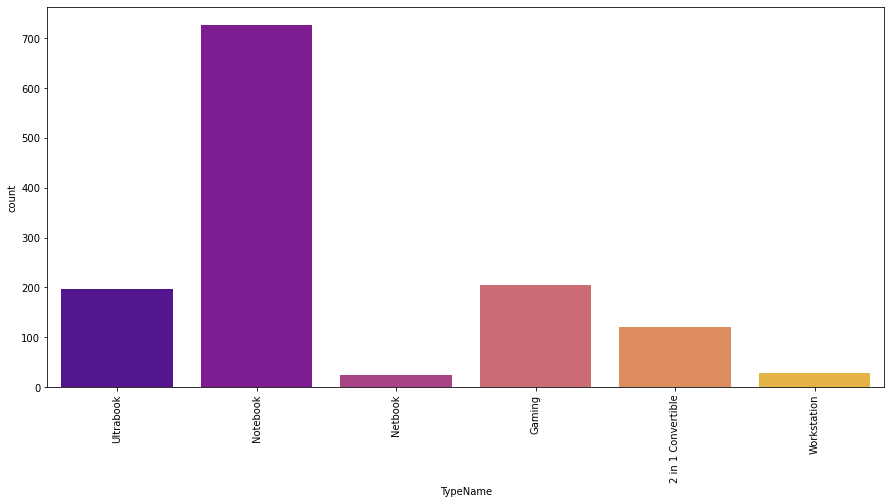

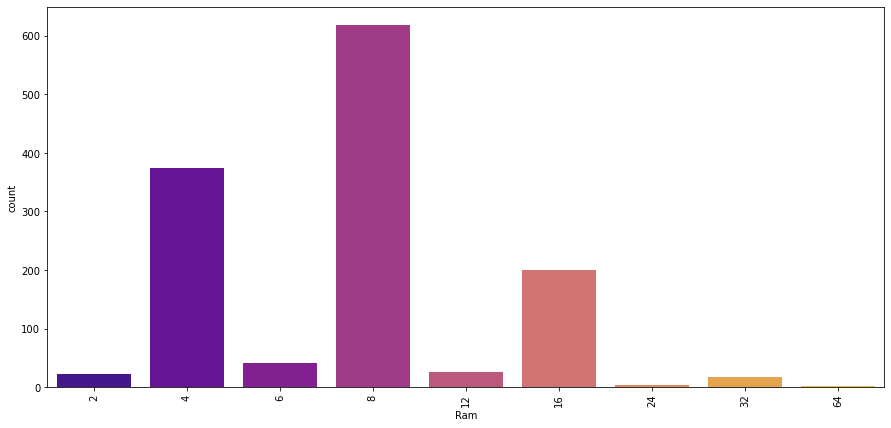

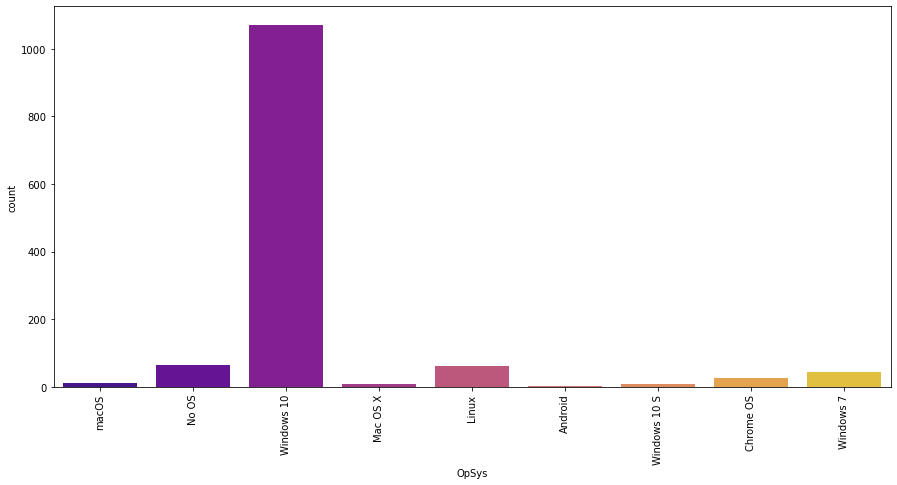

In [42]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(df[col], palette='plasma')
    plt.xticks(rotation='vertical')

toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
    drawplot(col)

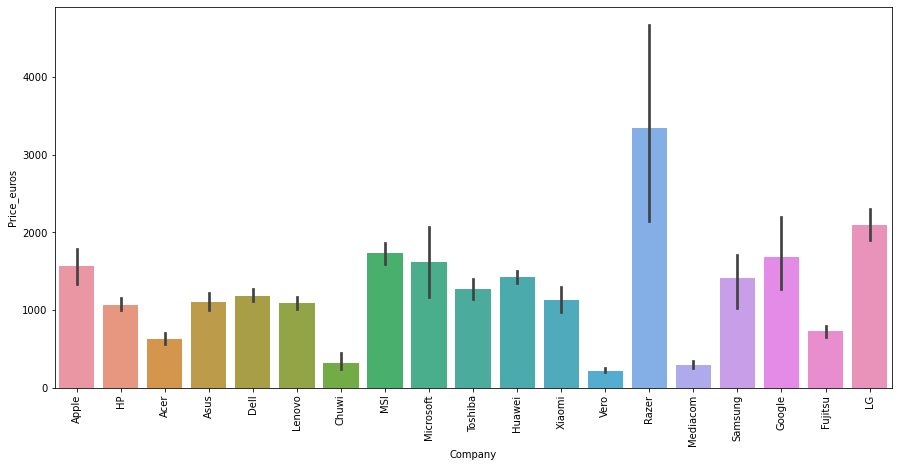

In [44]:
# average of the price by the brand
plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'], y = df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

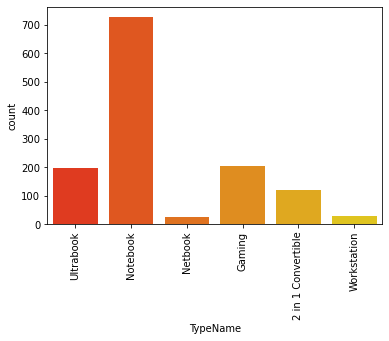

In [46]:
# various type of laptop

sn.countplot(df['TypeName'], palette='autumn')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

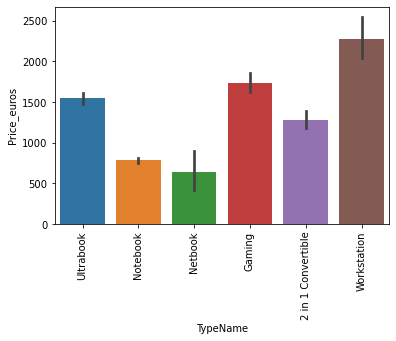

In [47]:
# laptop type and variation about the price

sn.barplot(x= df['TypeName'], y= df['Price_euros'])
plt.xticks( rotation = 'vertical')

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

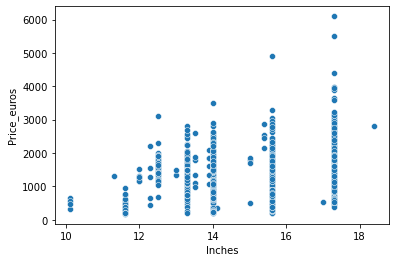

In [48]:
# variation of inches towards the prices

sn.scatterplot(x = df['Inches'], y = df['Price_euros'])

In [49]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [50]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                    if 'Touchscreen' in element else 0)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


In [51]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
1216,Acer,E5 774G,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,598.0,0
789,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.62,985.0,0
871,Lenovo,IdeaPad 110-15ISK,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,No OS,2.20,479.0,0
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,2397.0,1
32,HP,17-ak001nv (A6-9220/4GB/500GB/Radeon,Notebook,17.3,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4,500GB HDD,AMD Radeon 530,Windows 10,2.71,439.0,0


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

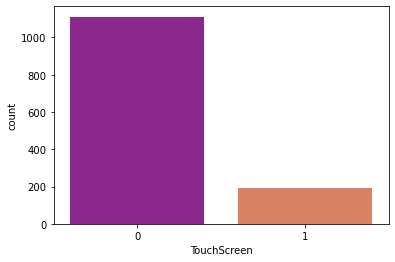

In [53]:
sn.countplot(x=df['TouchScreen'], palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

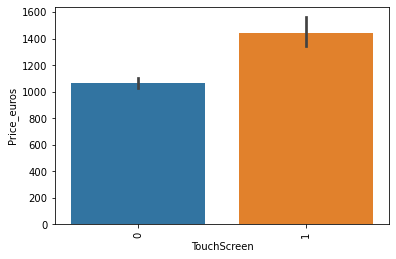

In [54]:
sn.barplot(x=df['TouchScreen'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')

In [55]:

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if 'IPS' in element else 0)

df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS
1143,HP,ZBook 15,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,2229.0,0,1
109,Lenovo,Thinkpad T470,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,1480.0,0,1
936,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.18,558.6,0,0
839,Asus,R558UA-DM966T (i5-7200U/8GB/128GB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB HDD,Intel HD Graphics 620,Windows 10,2.30,590.0,0,0
498,Lenovo,ThinkPad 13,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,949.0,0,1


<AxesSubplot:xlabel='IPS', ylabel='count'>

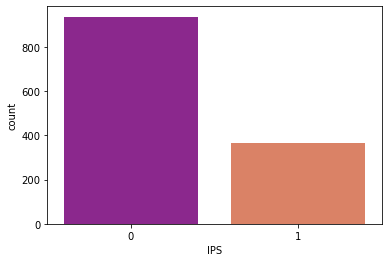

In [57]:
sn.countplot(x=df['IPS'], palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

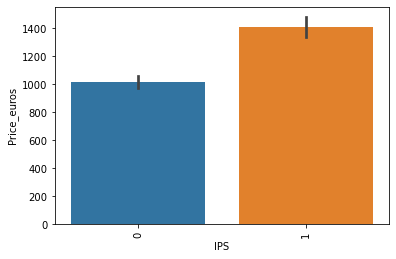

In [58]:
sn.barplot(x=df['IPS'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')

In [59]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [60]:
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [63]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(
    lambda x:x[0]) #extract number in the column

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [64]:
df['X_res']= df['X_res'].astype('int')
df['Y_res']= df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64

<AxesSubplot:>

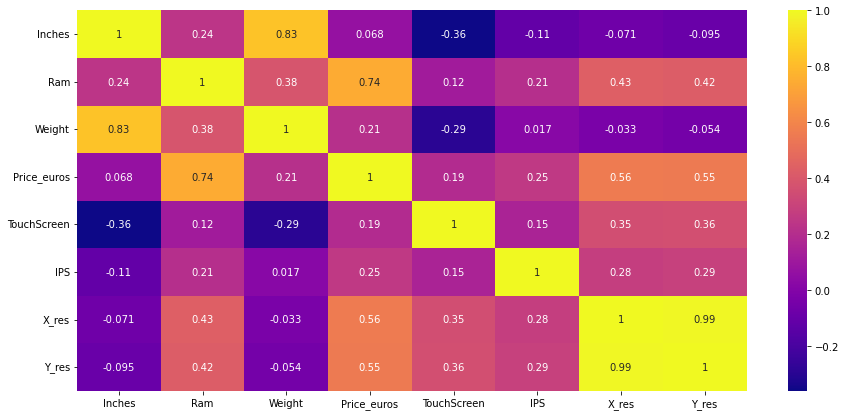

In [66]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True, cmap='plasma')

In [67]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [68]:
df['PPI'] = ((df['X_res']**2+df['Y_res']**2)**0.5/df['Inches']).astype('float')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [69]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price_euros, dtype: float64

In [71]:
df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace = True)
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [72]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [75]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.sample(10)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name
1050,Lenovo,ThinkPad X1,Notebook,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows 7,1.10,2620.0,0,1,209.800683,Intel Core i7
1282,HP,Stream 11-Y000na,Netbook,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,209.0,0,0,135.094211,Intel Celeron Dual
344,Dell,XPS 13,Ultrabook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,1579.0,0,0,165.632118,Intel Core i7
31,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,199.0,0,0,111.935204,AMD E-Series E2-6110
155,HP,15-BS103nv (i5-8250U/6GB/256GB/Radeon,Notebook,Intel Core i5 8250U 1.6GHz,6,256GB SSD,AMD Radeon 520,Windows 10,1.91,619.0,0,0,141.211998,Intel Core i5
621,Lenovo,ThinkPad T470,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.65,1465.0,0,0,157.350512,Intel Core i5
816,Razer,Blade Stealth,Ultrabook,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,1799.0,1,1,352.465147,Intel Core i7
246,HP,15-bs015dx (i5-7200U/8GB/1TB/W10),Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,559.0,1,0,100.454670,Intel Core i5
606,Toshiba,Tecra Z50-C-144,Notebook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,1399.0,0,1,141.211998,Intel Core i7
998,Asus,Rog GL553VE-DS74,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,1799.0,0,0,141.211998,Intel Core i7


In [78]:
def processortype(text):

    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

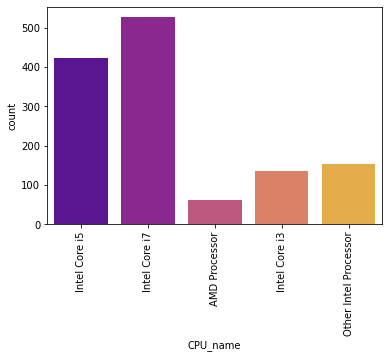

In [80]:
sn.countplot(x=df['CPU_name'], palette='plasma')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

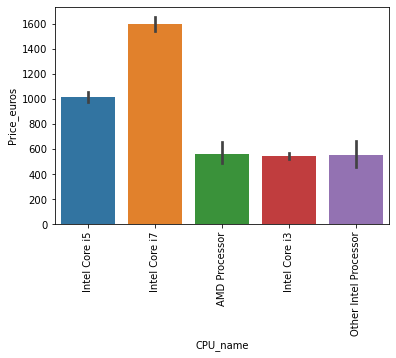

In [81]:
sn.barplot(x=df['CPU_name'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')

In [82]:
df.drop(columns=['Cpu'], inplace=True)
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


<AxesSubplot:xlabel='Ram', ylabel='count'>

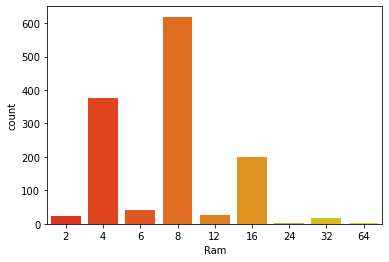

In [84]:
sn.countplot(x=df['Ram'], palette='autumn')

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

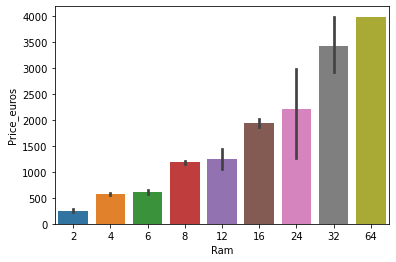

In [85]:
sn.barplot(x=df['Ram'], y=df['Price_euros'])

In [86]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [87]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].astype(str).replace('GB','',regex = True)
df['Memory'] = df['Memory'].astype(str).replace('TB','000',regex = True)

newdf = df['Memory'].str.split("+", n = 1, expand= True)
newdf


,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [88]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256 SSD
